In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Vanishing/Exploding Gradients
A = np.random.randn(5,5)
N = 3
for _ in range(N):
    A = A @ A

print(A)

[[-21.58952252 -32.18051162  10.62841964   0.40104013 -17.44873974]
 [  6.40968417   5.06100271  -5.93776699   6.12246985 -62.28453197]
 [ 28.66427885  31.24140954  -2.8780044  -26.35200602   1.50264086]
 [ 30.40784083  32.07166776   3.31529519 -20.21181643 -12.55730354]
 [  3.93717443   3.42695487 -21.55830447   3.03645638 -78.13993424]]


In [60]:
import tensorflow as tf

# create a simple model
model = tf.keras.models.Sequential(
    tf.keras.layers.Dense(
        10, kernel_initializer="random_normal", activation="sigmoid", input_shape=(10,)
    )
)

# way too many fully connected layers
for _ in range(10):
    model.add(
        tf.keras.layers.Dense(
            10, kernel_initializer="random_normal", activation="sigmoid"
        )
    )

model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Dummy dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=10, n_classes=2)

# train the model
history = model.fit(X, y, epochs=100, batch_size=10, validation_split=0.2)

Epoch 1/100
80/80 [==============================] - 2s 4ms/step - loss: 0.7144 - accuracy: 0.4925 - val_loss: 0.6923 - val_accuracy: 0.5200
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4750 - val_loss: 0.6937 - val_accuracy: 0.4800
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5075 - val_loss: 0.6939 - val_accuracy: 0.4800
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4825 - val_loss: 0.6950 - val_accuracy: 0.4800
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5075 - val_loss: 0.6933 - val_accuracy: 0.4800
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4850 - val_loss: 0.6932 - val_accuracy: 0.4800
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4700 - val_loss: 0.6942 - val_accuracy: 0.4800
Epoch 8/100
8

Text(0, 0.5, 'Mean of weights')

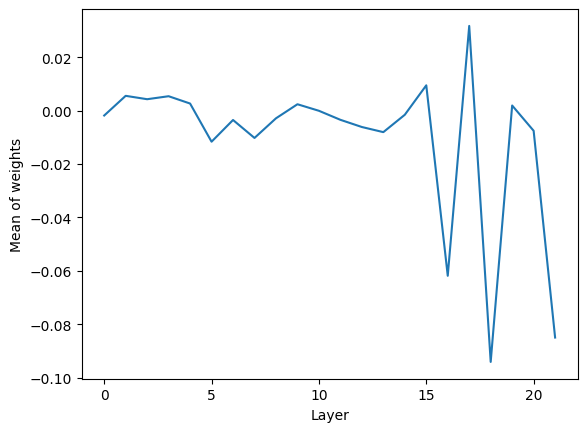

In [62]:
# plot the mean value of the weights
mean_weights = []
for layer in model.layers:
    mean_weights.append(np.mean(layer.get_weights()[0]))

plt.plot(mean_weights)
plt.xlabel('Layer')
plt.ylabel('Mean of weights')